<a href="https://colab.research.google.com/github/tooflesswulf/cyclic_quotient/blob/master/cyclic_quot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web sync copy on github:

[cyclic_quotient](https://github.com/tooflesswulf/cyclic_quotient)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('image', cmap='hot')

%matplotlib inline

In [ ]:
def order(a,n):
    for i in (range(n)):
        if((a * (i+1)) % (n) == 0):
            return (i+1)
def values(a,b,n):
    return np.lcm(order(a,n), order(b,n))*np.gcd(n,a+b)/(n)
def check_thm(n):
    table = np.zeros(shape=(n,n))
    for i in range(n):
        for j in range(i, n):
            table[i, j] = values(i, j, n)
            table[j, i] = table[i, j]

    return table

In [ ]:
def off_diag(sz, val):
  mat = np.ones((sz, sz))
  blyat = np.arange(sz)[1:]
  mat[blyat, blyat[::-1]] = val
  return mat

def tile(mat, n):
  return np.tile(mat, (n,n))


In [83]:
# prime matrix of p^n
def prime_mat(p, n=1):
  m = off_diag(p, p)
  sz = p
  while n > 1:
    sz = sz * p
    m = tile(m, p) * off_diag(sz, p)
    n -= 1
  return m

def primes(n):
    primfac = []
    d = 2
    while d*d <= n:
        while (n % d) == 0:
            primfac.append(d)  # supposing you want multiple factors repeated
            n //= d
        d += 1
    if n > 1:
       primfac.append(n)
    return primfac

def yoink(n):
  mats = [prime_mat(p, n) for p, n in np.array(np.unique(primes(n), return_counts=True)).T]
  mat = mats[0]
  for m in mats[1:]:
    s1,_ = mat.shape
    s2,_ = m.shape
    mat = tile(mat, s2) * tile(m, s1)
  return mat

In [85]:
[np.all(yoink(k) - check_thm(k) == 0) for k in [2,3,7,14,32,54]]

[True, True, True, True, True, True]

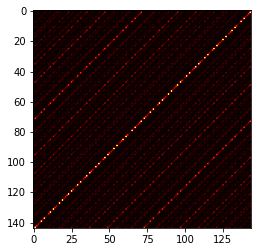

In [61]:
blyat = tile(mats[1], 9) * tile(mats[0], 16)
plt.imshow(blyat)

In [64]:
np.all(blyat - check_thm(144) == 0)

True

In [92]:
np.apply_along_axis(np.mgrid[0:4,0:4].T)

array([[[0, 0],
        [1, 0],
        [2, 0],
        [3, 0]],

       [[0, 1],
        [1, 1],
        [2, 1],
        [3, 1]],

       [[0, 2],
        [1, 2],
        [2, 2],
        [3, 2]],

       [[0, 3],
        [1, 3],
        [2, 3],
        [3, 3]]])